<a href="https://colab.research.google.com/github/campeone-pixel/soccer_database/blob/master/ProyectoDS_ParteI_%2BCannoni%2BPoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import sqlite3
import pandas as pd
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# df_games = pd.read_csv("games.csv")
# df_teams = pd.read_csv("teams.csv")
# df_teamstats = pd.read_csv("teamstats.csv")
# df_leagues = pd.read_csv("leagues.csv")
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")


df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/games.csv")
df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/teams.csv")
df_teamstats = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/teamstats.csv")
df_leagues = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/leagues.csv")
df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/appearances.csv")
df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/players.csv", encoding="ISO-8859-1")
df_shots = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/shots.csv")

# Organizamos las tablas

## Primero mergeamos las tablas de df_leagues,df_teams y df_teamstats con df_games

In [26]:
df_teamstats_away = df_teamstats.loc[df_teamstats["location"] == "a"]
df_teamstats_home = df_teamstats.loc[df_teamstats["location"] == "h"]
df_teamstats_merged = pd.merge(
    df_teamstats_home, df_teamstats_away, on="gameID", suffixes=["_home", "_away"]
)

df_games_merged_with_teamstats = pd.merge(
    df_games, df_teamstats_merged, on="gameID", suffixes=("", "_remove")
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    df_games_merged_with_teamstats.iloc[:, 13:34], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["homeProbability", "drawProbability", "awayProbability"], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["teamID_home", "teamID_away"], axis=1
)

df_games_merged_with_leagues = pd.merge(
    df_games_merged_with_teamstats, df_leagues, on="leagueID"
)

df_games_merged_with_team = pd.merge(
    df_games_merged_with_leagues,
    df_teams,
    left_on=["homeTeamID"],
    right_on=["teamID"],
    how="left",
)
df_games_merged_with_team = pd.merge(
    df_games_merged_with_team,
    df_teams,
    left_on=["awayTeamID"],
    right_on=["teamID"],
    how="left",
)

df_f_game = df_games_merged_with_team.rename(
    columns={"name_x": "liga", "name_y": "home_name", "name": "away_name"}
)
df_f_game = df_f_game.drop(
    [
        "understatNotation",
        "season_home",
        "date_home",
        "location_home",
        "goals_away",
        "goals_home",
        "season_away",
        "date_away",
        "location_away",
        "location_away",
        "teamID_x",
        "teamID_y",
    ],
    axis=1,
)




In [27]:
df_appearances_merged_with_players = pd.merge(
    df_appearances, df_players, on="playerID", suffixes=("", "_remove"))

In [28]:
df_appearances_merged_with_players

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID,name
0,81,560,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1,Sergio Romero
1,91,560,0,0,0,0.000000,0.058938,0.058938,0,0,0.000000,GK,1,0,0,90,0,0,1,Sergio Romero
2,101,560,0,0,0,0.000000,0.014860,0.014860,0,0,0.000000,GK,1,0,0,90,0,0,1,Sergio Romero
3,120,560,0,0,0,0.000000,0.570477,0.570477,0,0,0.000000,GK,1,0,0,90,0,0,1,Sergio Romero
4,3412,560,0,0,0,0.000000,0.054445,0.054445,0,0,0.000000,GK,1,0,0,90,0,0,1,Sergio Romero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356508,16132,7396,0,0,0,0.000000,0.251697,0.251697,0,0,0.000000,DC,3,0,0,90,0,0,5,Loic Bessile
356509,16134,9566,0,0,1,0.019131,0.019131,0.000000,0,0,0.000000,Sub,17,0,0,29,0,474027,5,Yanis Lhéry
356510,16134,9565,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,Sub,17,0,0,12,0,474032,5,Mathys Saban
356511,16134,9568,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,Sub,17,0,0,1,0,474045,5,Charles Costes


In [29]:

df_f_game.to_csv("df_f_game.csv")

In [30]:
df_f_game['month'] = pd.DatetimeIndex(df_f_game['date']).month

<AxesSubplot: ylabel='gameID'>

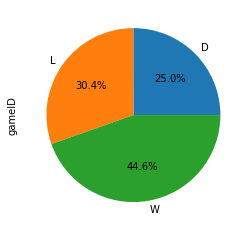

In [31]:
df_f_game.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%')

In [32]:
df_f_game["totalGoals"]= df_f_game["homeGoals"]  + df_f_game["awayGoals"]
df_f_game["goal_diff"]= abs(df_f_game["homeGoals"]  - df_f_game["awayGoals"])

<AxesSubplot: xlabel='season'>

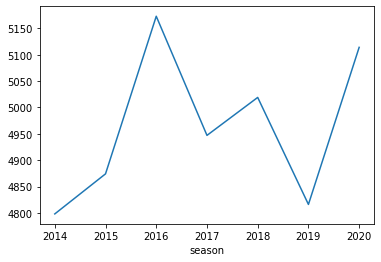

In [33]:
df_f_game.groupby(['season'])['totalGoals'].sum().plot()

<AxesSubplot: xlabel='liga,season'>

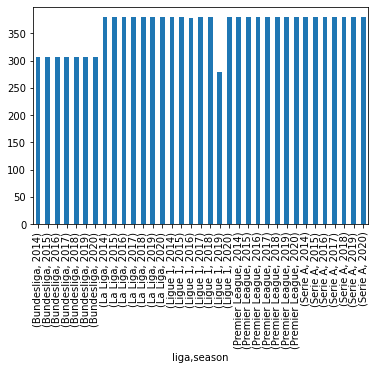

In [34]:
df_f_game.groupby(['liga','season'])['gameID'].count().plot(kind='bar')

<AxesSubplot: xlabel='month', ylabel='Count'>

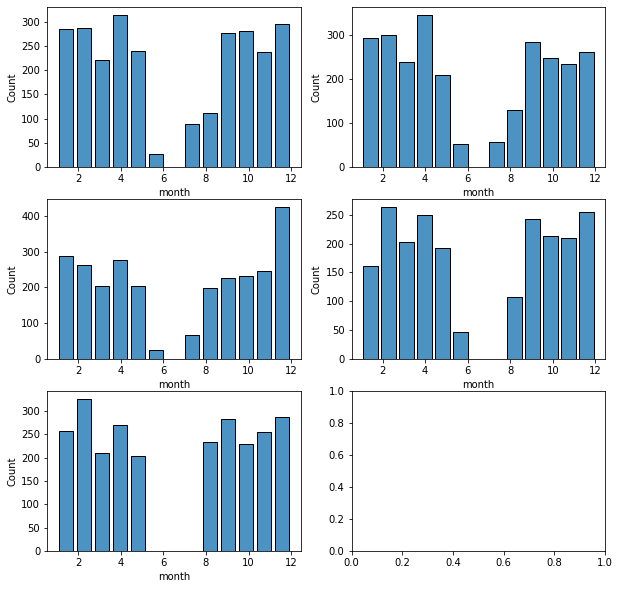

In [35]:
df_f_game_seriea=df_f_game.loc[df_f_game['liga']=="Serie A"]
df_f_game_laliga=df_f_game.loc[df_f_game['liga']=="La Liga"]
df_f_game_premier=df_f_game.loc[df_f_game['liga']=="Premier League"]
df_f_game_bundesliga=df_f_game.loc[df_f_game['liga']=="Bundesliga"]
df_f_game_ligue1=df_f_game.loc[df_f_game['liga']=="Ligue 1"]

figure, axis = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df_f_game_seriea, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,0])
sns.histplot(data=df_f_game_laliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,1])
sns.histplot(data=df_f_game_premier, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,0])
sns.histplot(data=df_f_game_bundesliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,1])
sns.histplot(data=df_f_game_ligue1, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[2,0])


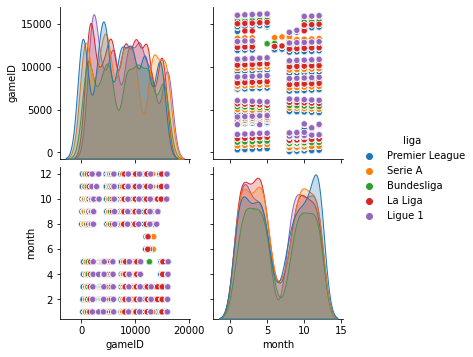

In [36]:
data=df_f_game.loc[:,["gameID","month","liga"]]
sns.pairplot(data=data, hue="liga")


## Mergeamos las tablas de df_apperances,df_shots y df_players

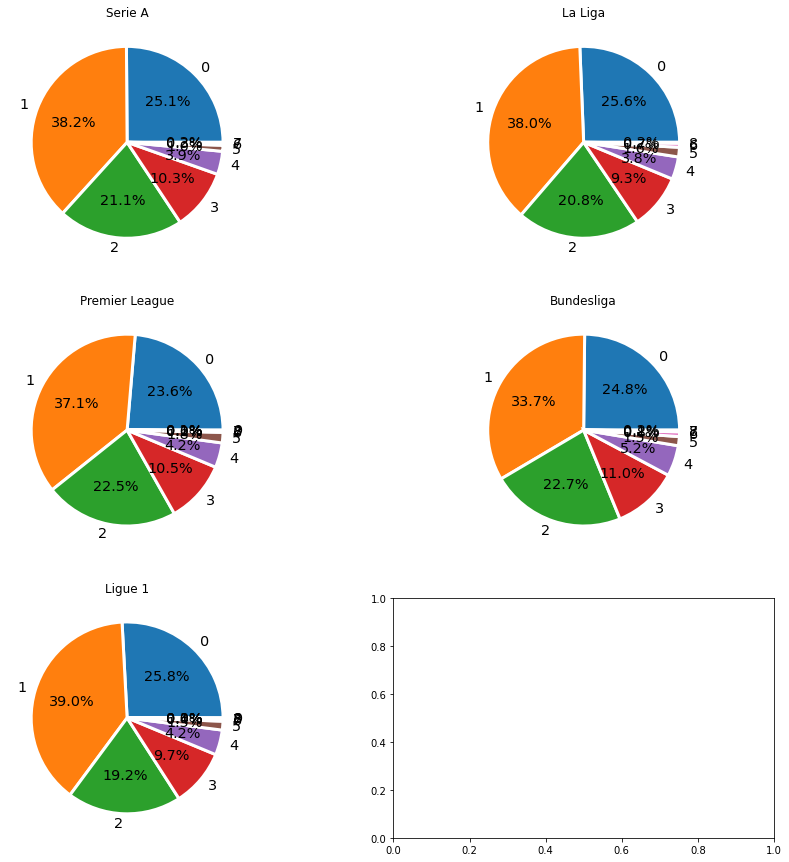

In [37]:

x_seriea=df_f_game_seriea.groupby(['goal_diff'])['gameID']
x_laliga=df_f_game_laliga.groupby(['goal_diff'])['gameID']
x_premier=df_f_game_premier.groupby(['goal_diff'])['gameID']
x_bundesliga=df_f_game_bundesliga.groupby(['goal_diff'])['gameID']
x_ligue1=df_f_game_ligue1.groupby(['goal_diff'])['gameID']




fig, ax = plt.subplots(3, 2, figsize=(15, 15))
autopct='%.1f%%'
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}
textprops={'size': 'x-large'}
ax[0,0].pie(x_seriea.count(),labels= x_seriea.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,1].pie(x_laliga.count(),labels= x_laliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,0].pie(x_premier.count(),labels= x_premier.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,1].pie(x_bundesliga.count(),labels= x_bundesliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[2,0].pie(x_ligue1.count(),labels= x_ligue1.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,0].set_title('Serie A')
ax[0,1].set_title('La Liga')
ax[1,0].set_title('Premier League')
ax[1,1].set_title('Bundesliga')
ax[2,0].set_title('Ligue 1')
plt.show()

In [38]:
# df_games 
# df_teams 
# df_teamstats 
# df_leagues 
# df_appearances 
# df_players
# df_shots 

df_p_app= pd.merge(
    df_appearances,
    df_players,
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)



In [39]:
df_p_app= pd.merge(
    df_p_app,
    df_games[['gameID','season']],
    on='gameID',
    how="left",
)

In [44]:
df_p_app

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,...,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID,name,season
0,81,560,0,0,0,0.000000,0.000000,0.000000,0,0,...,GK,1,0,0,90,0,0,1,Sergio Romero,2015
1,81,557,0,0,0,0.000000,0.106513,0.106513,0,1,...,DR,2,0,0,82,222605,0,1,Matteo Darmian,2015
2,81,548,0,0,0,0.000000,0.127738,0.127738,0,0,...,DC,3,0,0,90,0,0,1,Daley Blind,2015
3,81,628,0,0,0,0.000000,0.106513,0.106513,0,0,...,DC,3,0,0,90,0,0,1,Chris Smalling,2015
4,81,1006,0,0,0,0.000000,0.021225,0.021225,0,0,...,DL,4,0,0,90,0,0,1,Luke Shaw,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356508,16135,3509,0,0,1,0.028713,0.058495,0.058495,0,0,...,MC,9,0,0,90,0,0,5,Fabien Lemoine,2020
356509,16135,4882,0,0,1,0.013482,0.058495,0.045374,0,2,...,MC,9,0,0,90,0,0,5,Laurent Abergel,2020
356510,16135,5786,0,0,0,0.000000,0.045374,0.045374,0,0,...,FW,15,0,0,90,0,0,5,Yoane Wissa,2020
356511,16135,8997,0,0,0,0.000000,0.000000,0.000000,0,0,...,FW,15,0,0,78,474075,0,5,Terem Igobor Moffi,2020


In [45]:
df_prob_stats= pd.merge(
    df_p_app[["gameID","goals","playerID","xGoals","xGoalsChain","xGoalsBuildup","xAssists",'season']],
    df_players[['name',"playerID"]],
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)

In [46]:

df_prob_stats= df_prob_stats[['gameID','season','name', 'playerID', 'goals', 'xGoals', 'xGoalsChain', 'xGoalsBuildup',
       'xAssists' ]]

In [47]:
df_prob_stats

,gameID,season,name,playerID,goals,xGoals,xGoalsChain,xGoalsBuildup,xAssists
0,81,2015,Sergio Romero,560,0,0.000000,0.000000,0.000000,0.000000
1,81,2015,Matteo Darmian,557,0,0.000000,0.106513,0.106513,0.106513
2,81,2015,Daley Blind,548,0,0.000000,0.127738,0.127738,0.000000
3,81,2015,Chris Smalling,628,0,0.000000,0.106513,0.106513,0.000000
4,81,2015,Luke Shaw,1006,0,0.000000,0.021225,0.021225,0.000000
...,...,...,...,...,...,...,...,...,...
356508,16135,2020,Fabien Lemoine,3509,0,0.028713,0.058495,0.058495,0.000000
356509,16135,2020,Laurent Abergel,4882,0,0.013482,0.058495,0.045374,0.058495
356510,16135,2020,Yoane Wissa,5786,0,0.000000,0.045374,0.045374,0.000000
356511,16135,2020,Terem Igobor Moffi,8997,0,0.000000,0.000000,0.000000,0.000000


In [48]:
(df_prob_stats[df_prob_stats['name'].str.contains("Messi")])

,gameID,season,name,playerID,goals,xGoals,xGoalsChain,xGoalsBuildup,xAssists
36714,1404,2015,Lionel Messi,2097,0,0.906503,0.277046,0.048860,0.134688
36896,1411,2015,Lionel Messi,2097,0,0.409798,0.607837,0.224740,0.475536
37219,1422,2015,Lionel Messi,2097,1,0.622834,0.707230,0.232840,0.478003
37620,1437,2015,Lionel Messi,2097,2,2.119797,1.275917,0.210097,0.734600
37800,1443,2015,Lionel Messi,2097,0,0.709223,1.486355,0.122692,0.901774
...,...,...,...,...,...,...,...,...,...
344764,15747,2020,Junior Messias,8838,0,0.576776,0.492483,0.102196,0.000000
345177,15761,2020,Junior Messias,8838,0,0.028677,0.028677,0.000000,0.000000
345432,15769,2020,Junior Messias,8838,0,0.044806,0.107205,0.062399,0.062399
345909,15785,2020,Junior Messias,8838,1,0.166062,0.528115,0.362053,0.000000


In [54]:

grouped_goal_total=df_prob_stats.groupby(["name"],as_index=False)["goals"].sum()


In [55]:
grouped_goal_total

,name,goals
0,Aaron Connolly,5
1,Aaron Cresswell,8
2,Aaron Hickey,0
3,Aaron Hunt,10
4,Aaron Lennon,8
...,...,...
6379,Óscar Romero,0
6380,Óscar Trejo,11
6381,Ömer Toprak,5
6382,Özkan Yildirim,0


In [56]:
mas_de_100=grouped_goal_total.loc[grouped_goal_total['goals']>100]

In [57]:
mas_de_100.sort_values(by='goals',inplace=True )
mas_de_100

c:\Users\Mati\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,goals
1773,Fabio Quagliarella,102
2417,Iago Aspas,105
6168,Wissam Ben Yedder,107
3404,Kylian Mbappe-Lottin,107
2231,Gonzalo Higuaín,113
4533,Neymar,114
522,Antoine Griezmann,116
2638,Jamie Vardy,118
3238,Karim Benzema,120
4169,Mauro Icardi,121


<BarContainer object of 22 artists>

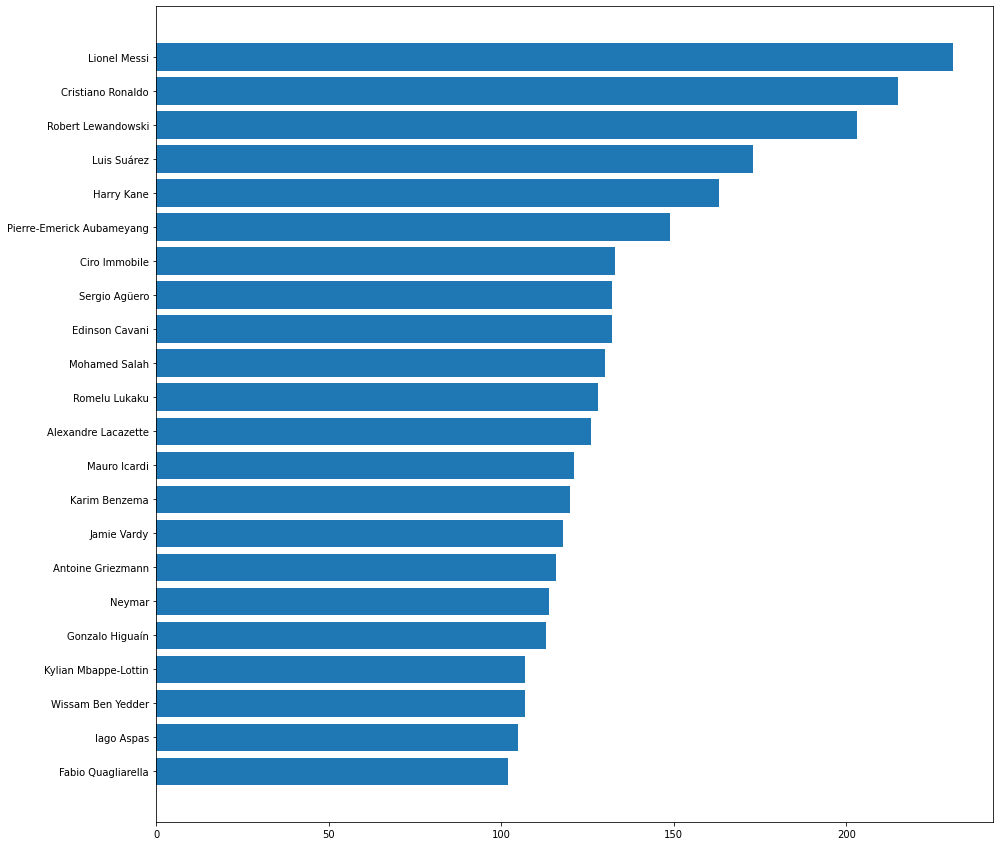

In [58]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(list(mas_de_100["name"])  ,  list(mas_de_100['goals'])  )

In [75]:
df_filtered=df_prob_stats[df_prob_stats['name'].isin(mas_de_100['name'])]

In [78]:
df_filtered=df_filtered.groupby(["name",'season'],as_index=False)["goals"].sum()

In [84]:
(df_filtered[df_filtered['name'].str.contains("Messi")])

,name,season,goals
82,Lionel Messi,2014,43
83,Lionel Messi,2015,26
84,Lionel Messi,2016,37
85,Lionel Messi,2017,34
86,Lionel Messi,2018,36
87,Lionel Messi,2019,25
88,Lionel Messi,2020,30
